In [1]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#import warnings
#warnings.filterwarnings("ignore")
torch.__version__

'1.7.0'

In [2]:
class CFG:
    lr = 3e-3
    epochs = 30
    dl_lens = 500  # len(trn_loader)
    optimizer = optim.Adam
    scheduler = None


model = nn.Linear(1, 1)


def show_learning_rate_scheduler():
    lrs = []
    moms = []

    iter_lr_sc_list = ['OneCycleLR', 'CyclicLR']
    scheduler_name = scheduler.__class__.__name__
    xlabel = 'iterations' if scheduler_name in iter_lr_sc_list else 'epochs'
    mom_name = 'betas' if optimizer.__class__.__name__ == 'Adam' else 'momentum'

    for epoch in range(CFG.epochs):
        for step in range(CFG.dl_lens):
            optimizer.step()
            if scheduler_name in iter_lr_sc_list:
                lrs.append(scheduler.optimizer.param_groups[0]['lr'])
                moms.append(scheduler.optimizer.param_groups[0][mom_name][0])
                scheduler.step()

        if scheduler_name not in iter_lr_sc_list:
            lrs.append(scheduler.optimizer.param_groups[0]['lr'])
            moms.append(scheduler.optimizer.param_groups[0][mom_name][0])
            scheduler.step()

    fig = plt.figure(figsize=(12, 4))
    fig.subplots_adjust(top=0.8)
    plt.suptitle(scheduler_name)
    plt.subplot(121)
    plt.title('learning_rate')
    plt.plot(lrs)
    plt.xlabel(xlabel)
    plt.subplot(122)
    plt.title('momentum')
    plt.plot(moms)
    plt.xlabel(xlabel)
    plt.show()

# LambdaLR

simple custom lr scheduler with lambda function

$lr = lr_{init} * Lambda(epoch)$

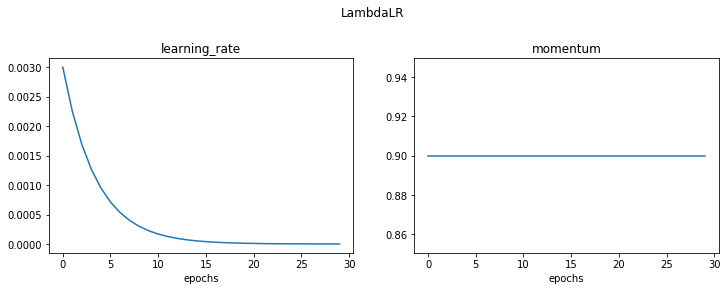

In [3]:
# show_learning_rate_scheduler
scheduler_param = {
    'lr_lambda': lambda epoch: 0.75 ** epoch,
}
CFG.scheduler = optim.lr_scheduler.LambdaLR
CFG.scheduler_param = scheduler_param


optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

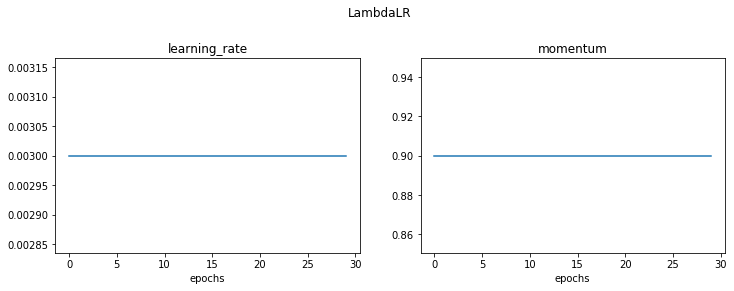

In [4]:
# show_learning_rate_scheduler
scheduler_param = {
    'lr_lambda': lambda epoch: 1,
}
CFG.scheduler = optim.lr_scheduler.LambdaLR
CFG.scheduler_param = scheduler_param


optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

# MultiplicativeLR

$lr_{epoch} = lr_{epoch-1} * Lambda(epoch)$

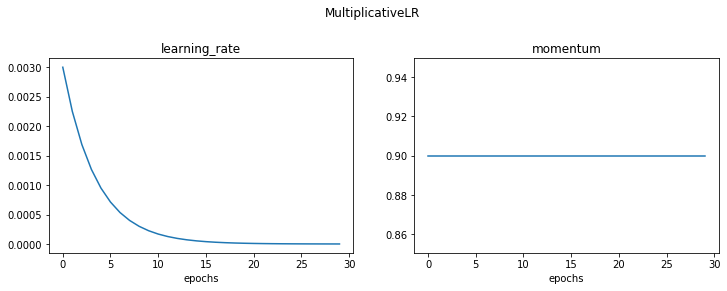

In [5]:
# show_learning_rate_scheduler
scheduler_param = {
    'lr_lambda': lambda epoch: 0.75
}
CFG.scheduler = optim.lr_scheduler.MultiplicativeLR
CFG.scheduler_param = scheduler_param


optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

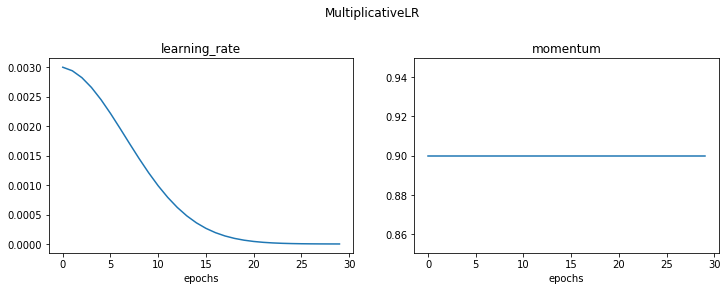

In [6]:
# show_learning_rate_scheduler
scheduler_param = {
    'lr_lambda': lambda epoch: 0.98 ** epoch
}
CFG.scheduler = optim.lr_scheduler.MultiplicativeLR
CFG.scheduler_param = scheduler_param


optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

# StepLR

step decay per step_size epoch

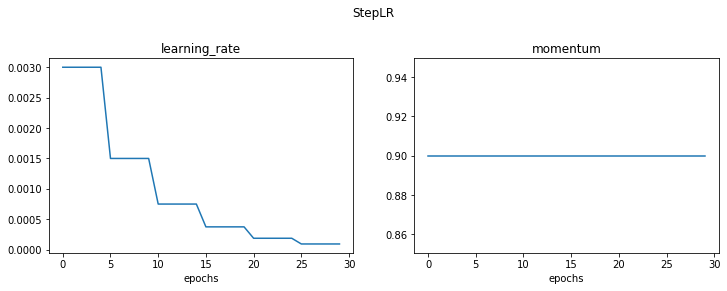

In [7]:
# show_learning_rate_scheduler
scheduler_param = {
    'step_size': 5, 
    'gamma': 0.5
}
CFG.scheduler = optim.lr_scheduler.StepLR
CFG.scheduler_param = scheduler_param


optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

# MultiStepLR

Assign step decay epoch

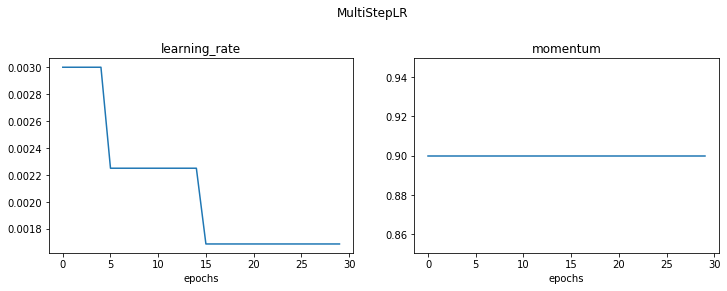

In [8]:
# show_learning_rate_scheduler
scheduler_param = {
    'milestones': [5, 15],
    'gamma': 0.75
}
CFG.scheduler = optim.lr_scheduler.MultiStepLR
CFG.scheduler_param = scheduler_param


optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

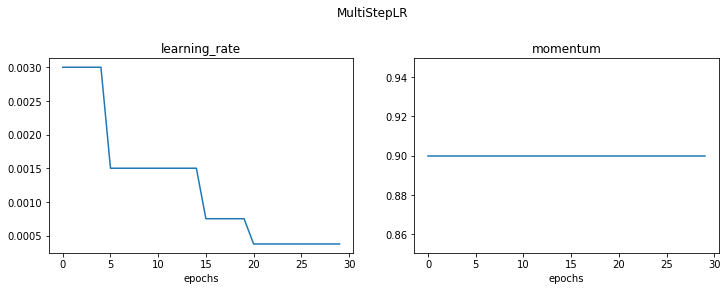

In [9]:
# show_learning_rate_scheduler
scheduler_param = {
    'milestones': [5, 15, 20],
    'gamma': 0.5
}
CFG.scheduler = optim.lr_scheduler.MultiStepLR
CFG.scheduler_param = scheduler_param


optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

# ExponentialLR

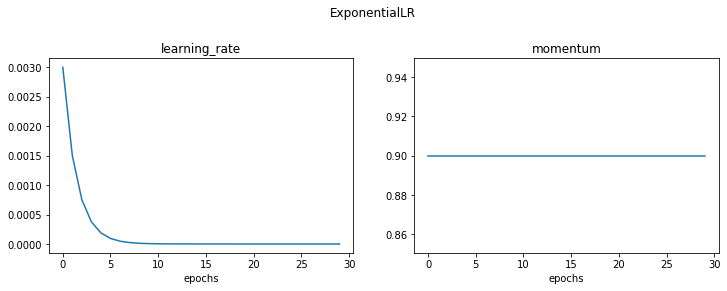

In [10]:
# 0.5
scheduler_param = {
    'gamma': 0.5
}
CFG.scheduler = optim.lr_scheduler.ExponentialLR
CFG.scheduler_param = scheduler_param


optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

In [11]:
# 0.75

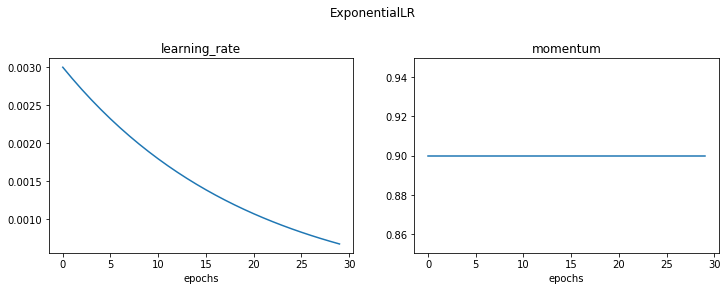

In [12]:
# 0.95
scheduler_param = {
    'gamma': 0.95
}
CFG.scheduler = optim.lr_scheduler.ExponentialLR
CFG.scheduler_param = scheduler_param


optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

# CosineAnnealingLR

Set the learning rate of each parameter group using a cosine annealing schedule, where $\eta_{max}$
is set to the initial lr and $T_{cur}$ is the `number of epochs since the last restart in SGDR`:

\begin{aligned}
            \eta_t & = \eta_{min} + \frac{1}{2}(\eta_{max} - \eta_{min})\left(1
            + \cos\left(\frac{T_{cur}}{T_{max}}\pi\right)\right),
            & T_{cur} \neq (2k+1)T_{max}; \\
            \eta_{t+1} & = \eta_{t} + \frac{1}{2}(\eta_{max} - \eta_{min})
            \left(1 - \cos\left(\frac{1}{T_{max}}\pi\right)\right),
            & T_{cur} = (2k+1)T_{max}.
        \end{aligned}

When last_epoch=-1, sets initial lr as lr. Notice that because the schedule is defined recursively, the learning rate can be simultaneously modified outside this scheduler by other operators. If the learning rate is set solely by this scheduler, the learning rate at each step becomes:
$$\eta_t = \eta_{min} + \frac{1}{2}(\eta_{max} - \eta_{min})\left(1 +
        \cos\left(\frac{T_{cur}}{T_{max}}\pi\right)\right)$$

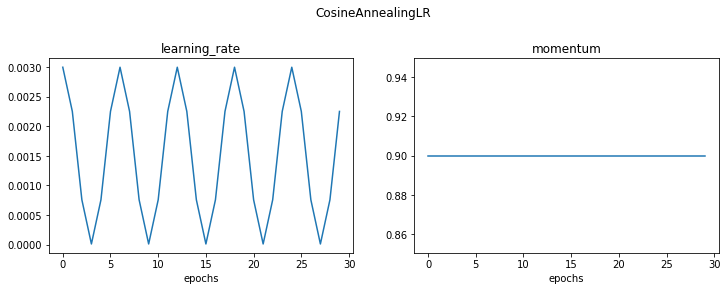

In [13]:
# CosineAnnealingLR
scheduler_param = {
    'T_max': 3,
    'eta_min': 1e-5}


CFG.scheduler = optim.lr_scheduler.CosineAnnealingLR
CFG.scheduler_param = scheduler_param


optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

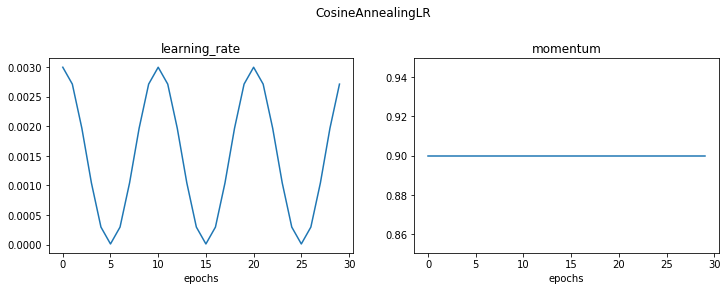

In [14]:
# CosineAnnealingLR
scheduler_param = {
    'T_max': 5,
    'eta_min': 1e-5}


CFG.scheduler = optim.lr_scheduler.CosineAnnealingLR
CFG.scheduler_param = scheduler_param


optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

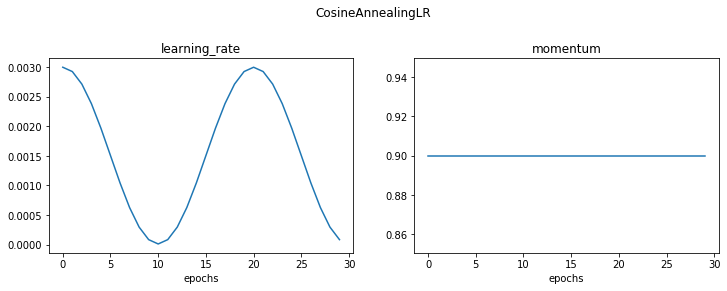

In [15]:
# CosineAnnealingLR
scheduler_param = {
    'T_max': 10,
    'eta_min': 1e-5}


CFG.scheduler = optim.lr_scheduler.CosineAnnealingLR
CFG.scheduler_param = scheduler_param


optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

It has been proposed in [SGDR: Stochastic Gradient Descent with Warm Restarts](https://arxiv.org/abs/1608.03983). Note that this only implements the cosine annealing part of SGDR, and not the restarts.

# ReduceLROnPlateau

Reduce learning rate when a `metric` has stopped improving. Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This scheduler reads a metrics quantity and if no improvement is seen for a ‘patience’ number of epochs, the learning rate is reduced.

# CyclicLR

`cycle_momentum`  still has bug in pytorch 1.7.0!!!

## triangular

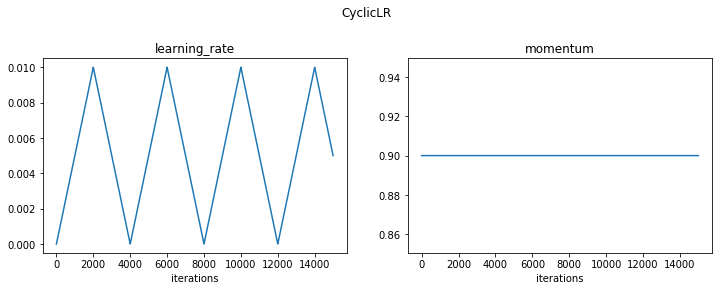

In [16]:
# show_learning_rate_scheduler
scheduler_param = {
    'base_lr': 1e-5,
    'max_lr': 1e-2,
    'step_size_up': 2000,
    'step_size_down': None,
    'mode': 'triangular',
    'gamma': 1.0,
    'scale_fn': None,  # custom policy
    'scale_mode': 'cycle',
    'cycle_momentum': False, # still has bug in pytorch 1.7.0!!!
    'base_momentum': 0.8,
    'max_momentum': 0.9,
}

CFG.scheduler = optim.lr_scheduler.CyclicLR
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

## triangular2

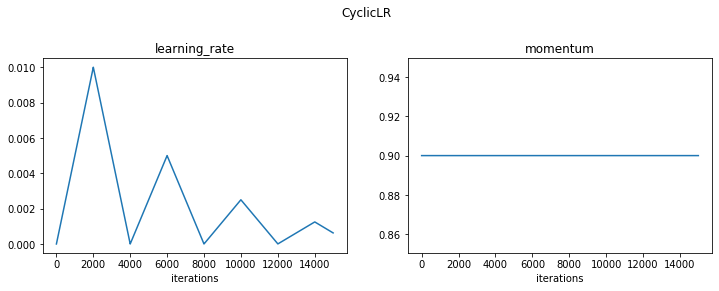

In [17]:
# show_learning_rate_scheduler
scheduler_param = {
    'base_lr': 1e-5,
    'max_lr': 1e-2,
    'step_size_up': 2000,
    'step_size_down': None,
    'mode': 'triangular2',
    'gamma': 1,
    'scale_fn': None,
    'scale_mode': 'cycle',
    'cycle_momentum': False, # still has bug in pytorch 1.7.0!!!
}

CFG.scheduler = optim.lr_scheduler.CyclicLR
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

## exp_range

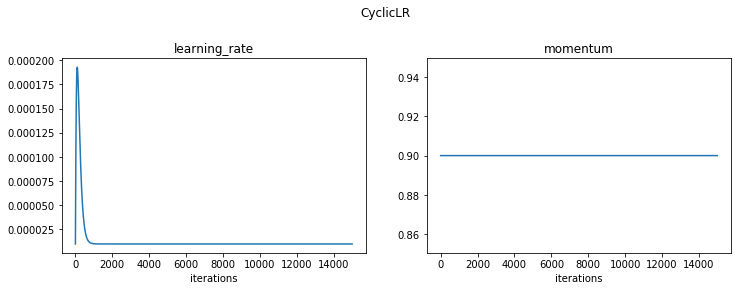

In [18]:
# show_learning_rate_scheduler
scheduler_param = {
    'base_lr': 1e-5,
    'max_lr': 1e-2,
    'step_size_up': 2000,
    'step_size_down': None,
    'mode': 'exp_range',
    'gamma': 0.99,  # gamma**(cycle iterations) for exp_range
    'scale_fn': None,
    'scale_mode': 'cycle',
    'cycle_momentum': False, # still has bug in pytorch 1.7.0!!!
}

CFG.scheduler = optim.lr_scheduler.CyclicLR
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

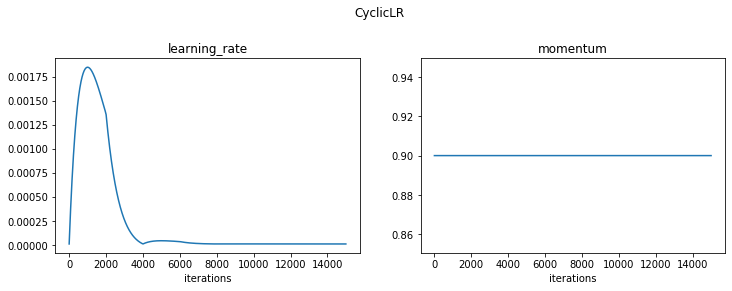

In [19]:
# show_learning_rate_scheduler
scheduler_param = {
    'base_lr': 1e-5,
    'max_lr': 1e-2,
    'step_size_up': 2000,
    'step_size_down': None,
    'mode': 'exp_range',
    'gamma': 0.999,  # gamma**(cycle iterations) for exp_range
    'scale_fn': None,
    'scale_mode': 'cycle',
    'cycle_momentum': False, # still has bug in pytorch 1.7.0!!!
}

CFG.scheduler = optim.lr_scheduler.CyclicLR
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

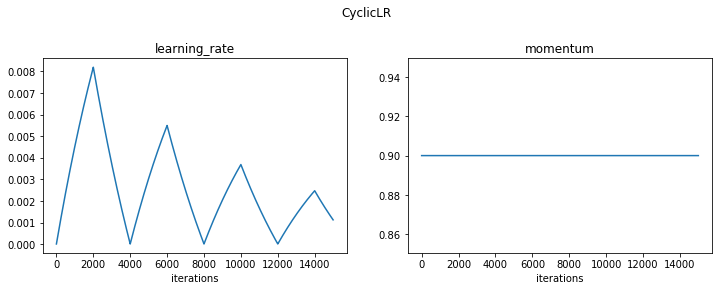

In [20]:
# show_learning_rate_scheduler
scheduler_param = {
    'base_lr': 1e-5,
    'max_lr': 1e-2,
    'step_size_up': 2000,
    'step_size_down': None,
    'mode': 'exp_range',
    'gamma': 0.9999,  # gamma**(cycle iterations) for exp_range
    'scale_fn': None,
    'scale_mode': 'cycle',
    'cycle_momentum': False, # still has bug in pytorch 1.7.0!!!
}

CFG.scheduler = optim.lr_scheduler.CyclicLR
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

## step_size_up_down

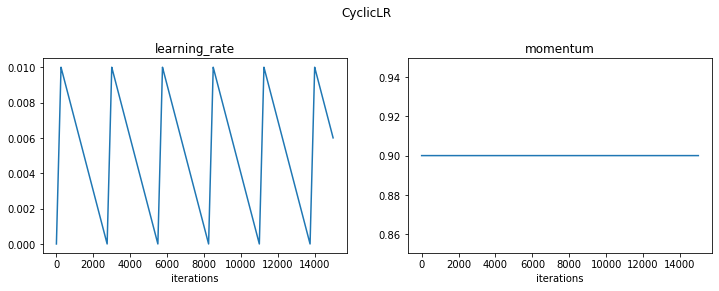

In [21]:
# show_learning_rate_scheduler
scheduler_param = {
    'base_lr': 1e-5,
    'max_lr': 1e-2,
    'step_size_up': 250,
    'step_size_down': 2500,
    'cycle_momentum': False, # still has bug in pytorch 1.7.0!!!
}

CFG.scheduler = optim.lr_scheduler.CyclicLR
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

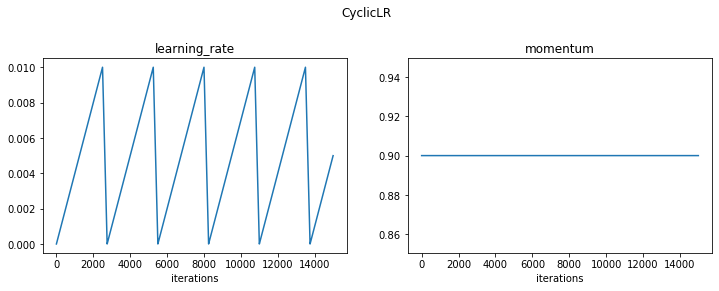

In [22]:
# show_learning_rate_scheduler
scheduler_param = {
    'base_lr': 1e-5,
    'max_lr': 1e-2,
    'step_size_up': 2500,
    'step_size_down': 250,
    'cycle_momentum': False, # still has bug in pytorch 1.7.0!!!
}

CFG.scheduler = optim.lr_scheduler.CyclicLR
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

# OneCycleLR

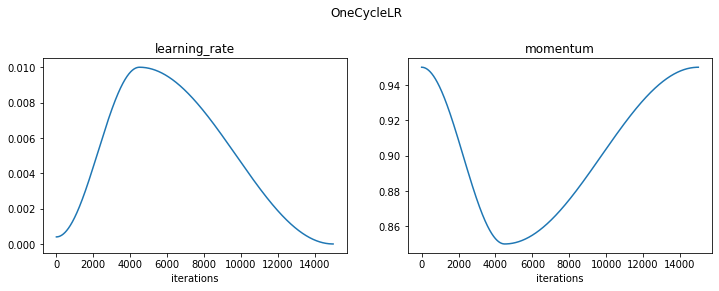

In [23]:
# show_learning_rate_scheduler
scheduler_param = {
    'max_lr': 1e-2,
    'total_steps': None,
    'epochs': CFG.epochs,
    'steps_per_epoch': CFG.dl_lens,
    'pct_start': 0.3,
    'anneal_strategy': 'cos',
    'cycle_momentum': True,
    'base_momentum': 0.85,
    'max_momentum': 0.95,
    'div_factor': 25.0,
    'final_div_factor': 10000.0,
}

CFG.scheduler = optim.lr_scheduler.OneCycleLR
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

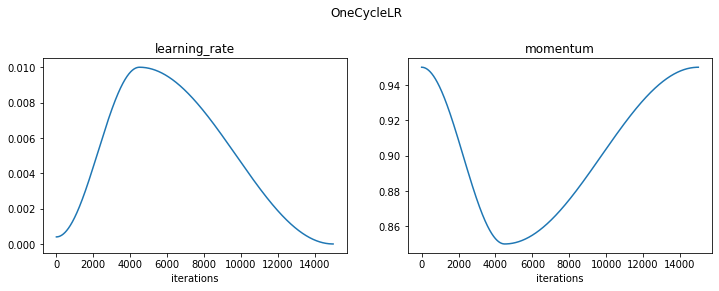

In [24]:
# show_learning_rate_scheduler
scheduler_param = {
    'max_lr': 1e-2,
    'total_steps': CFG.epochs * CFG.dl_lens,
    'epochs': None,
    'steps_per_epoch': None,
}

CFG.scheduler = optim.lr_scheduler.OneCycleLR
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

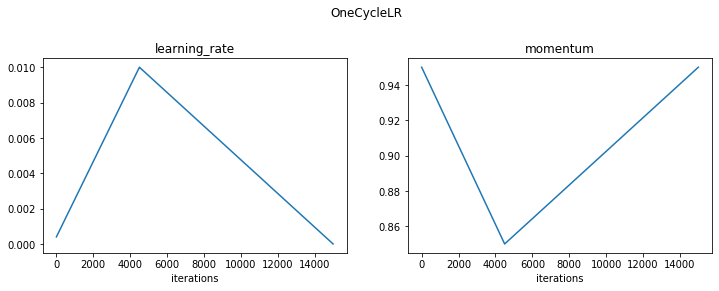

In [25]:
# show_learning_rate_scheduler
scheduler_param = {
    'max_lr': 1e-2,
    'epochs': CFG.epochs,
    'steps_per_epoch': CFG.dl_lens,
    'anneal_strategy': 'linear',
}

CFG.scheduler = optim.lr_scheduler.OneCycleLR
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

- **div_factor** (float) – Determines the initial learning rate via initial_lr = max_lr/div_factor Default: 25
- **final_div_factor** (float) – Determines the minimum learning rate via min_lr = initial_lr/final_div_factor Default: 1e4

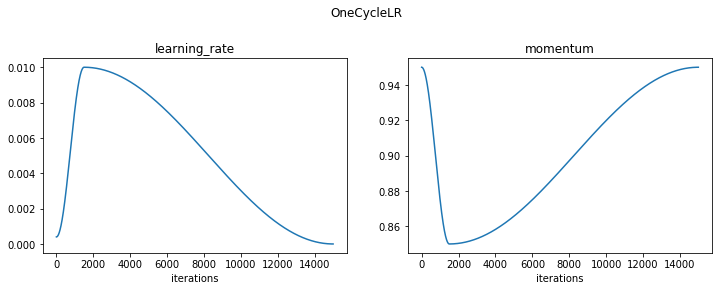

In [26]:
# show_learning_rate_scheduler
scheduler_param = {
    'max_lr': 1e-2,
    'epochs': CFG.epochs,
    'steps_per_epoch': CFG.dl_lens,
    'pct_start': 0.1,
    'anneal_strategy': 'cos',
    'div_factor': 25.0,  
    'final_div_factor': 1e3, 
}

CFG.scheduler = optim.lr_scheduler.OneCycleLR
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

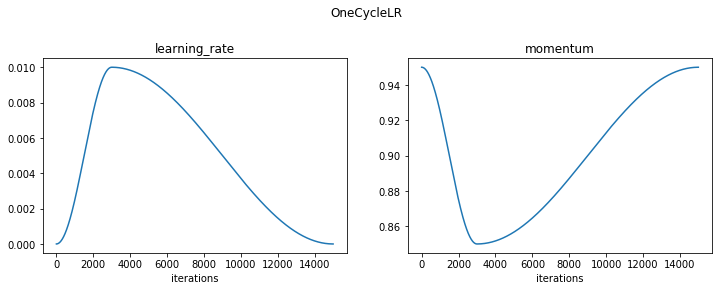

In [27]:
# show_learning_rate_scheduler
scheduler_param = {
    'max_lr': 1e-2,
    'epochs': CFG.epochs,
    'steps_per_epoch': CFG.dl_lens,
    'pct_start': 0.2,
    'anneal_strategy': 'cos',
    'div_factor': 1e4,  
    'final_div_factor': 1e4, 
}

CFG.scheduler = optim.lr_scheduler.OneCycleLR
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

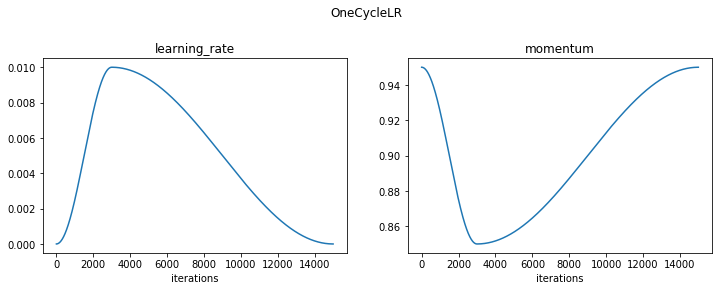

In [28]:
# show_learning_rate_scheduler
scheduler_param = {
    'max_lr': 1e-2,
    'epochs': CFG.epochs,
    'steps_per_epoch': CFG.dl_lens,
    'pct_start': 0.2,
    'anneal_strategy': 'cos',
    'div_factor': 1e4,  
    'final_div_factor': 1e4,
}

CFG.scheduler = optim.lr_scheduler.OneCycleLR
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

# CosineAnnealingWarmRestarts

$$\eta_t = \eta_{min} + \frac{1}{2}(\eta_{max} - \eta_{min})\left(1 +
\cos\left(\frac{T_{cur}}{T_{i}}\pi\right)\right)$$

When $T_{cur}=T_{i}$, set $\eta_t = \eta_{min}$.
When $T_{cur}=0$ after restart, set $\eta_t=\eta_{max}$.

It has been proposed in [SGDR: Stochastic Gradient Descent with Warm Restarts](https://arxiv.org/abs/1608.03983).

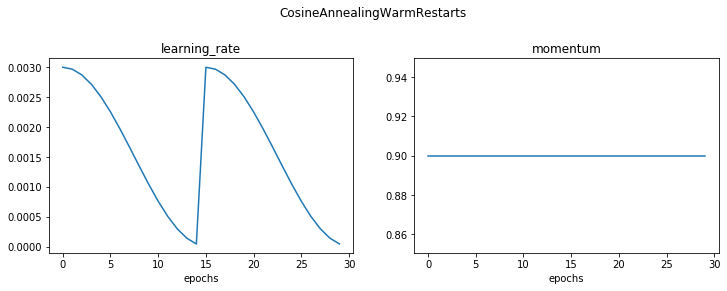

In [29]:
# show_learning_rate_scheduler
scheduler_param = {
    'T_0': 15, 
    'T_mult': 1, 
    'eta_min': 1e-5, 
}

CFG.scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

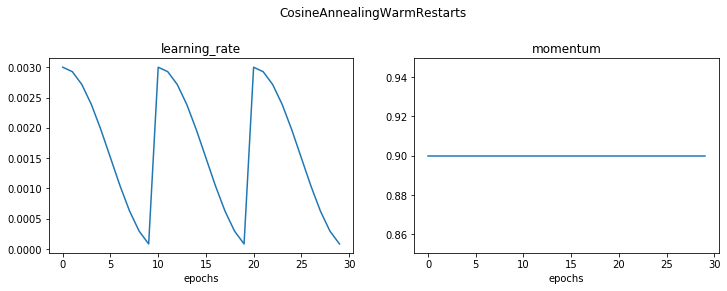

In [30]:
# show_learning_rate_scheduler
scheduler_param = {
    'T_0': 10, 
    'T_mult': 1, 
    'eta_min': 1e-5, 
}

CFG.scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

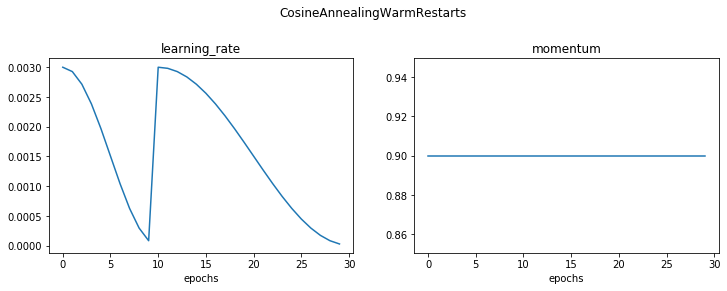

In [31]:
# show_learning_rate_scheduler
scheduler_param = {
    'T_0': 10, 
    'T_mult': 2, 
    'eta_min': 1e-5, 
}

CFG.scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

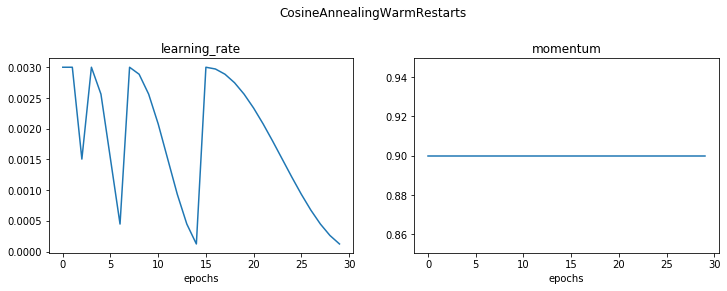

In [32]:
# show_learning_rate_scheduler
scheduler_param = {
    'T_0': 1, 
    'T_mult': 2, 
    'eta_min': 1e-5, 
}

CFG.scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()

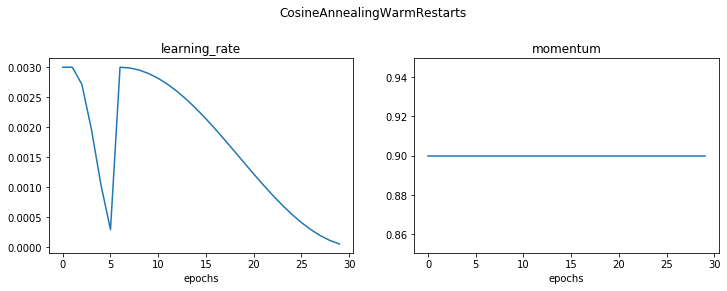

In [33]:
# show_learning_rate_scheduler
scheduler_param = {
    'T_0': 1, 
    'T_mult': 5, 
    'eta_min': 1e-5, 
}

CFG.scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts
CFG.scheduler_param = scheduler_param

optimizer = optim.Adam(model.parameters(), CFG.lr)
scheduler = CFG.scheduler(optimizer, **CFG.scheduler_param)
show_learning_rate_scheduler()